
# Competition Data Analysis and Model Building

This notebook automates the following tasks for each dataset folder within the Competition_data:
1. **Data Loading and Preprocessing**: Load each dataset, handle missing values, and perform feature engineering.
2. **Visualization**: Generate visualizations to understand the distribution and relationships between features.
3. **Model Training**: Split the data, train a binary classification model, and evaluate using accuracy, precision, and F1 score.
4. **Inference and Saving Results**: Make predictions on test data and save them to `y_predict.csv`.

## Scoring Metric
The final score is calculated as:
$$\text{Score} = \text{Accuracy} \times 0.3 + \text{Precision} \times 0.4 + \text{F1 Score} \times 0.3$$


In [1]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")


Processing ../Competition_data/Dataset_2...
Validation Results for ../Competition_data/Dataset_2: Accuracy=0.978, Precision=0.974, F1 Score=0.974, Score=0.975
Processing ../Competition_data/Dataset_35...
Validation Results for ../Competition_data/Dataset_35: Accuracy=0.761, Precision=0.750, F1 Score=0.522, Score=0.685
Processing ../Competition_data/Dataset_5...
Validation Results for ../Competition_data/Dataset_5: Accuracy=0.923, Precision=0.000, F1 Score=0.000, Score=0.277
Processing ../Competition_data/Dataset_32...
Validation Results for ../Competition_data/Dataset_32: Accuracy=0.807, Precision=0.188, F1 Score=0.207, Score=0.379
Processing ../Competition_data/Dataset_4...
Validation Results for ../Competition_data/Dataset_4: Accuracy=0.951, Precision=0.000, F1 Score=0.000, Score=0.285
Processing ../Competition_data/Dataset_33...
Validation Results for ../Competition_data/Dataset_33: Accuracy=1.000, Precision=1.000, F1 Score=1.000, Score=1.000
Processing ../Competition_data/Dataset_3

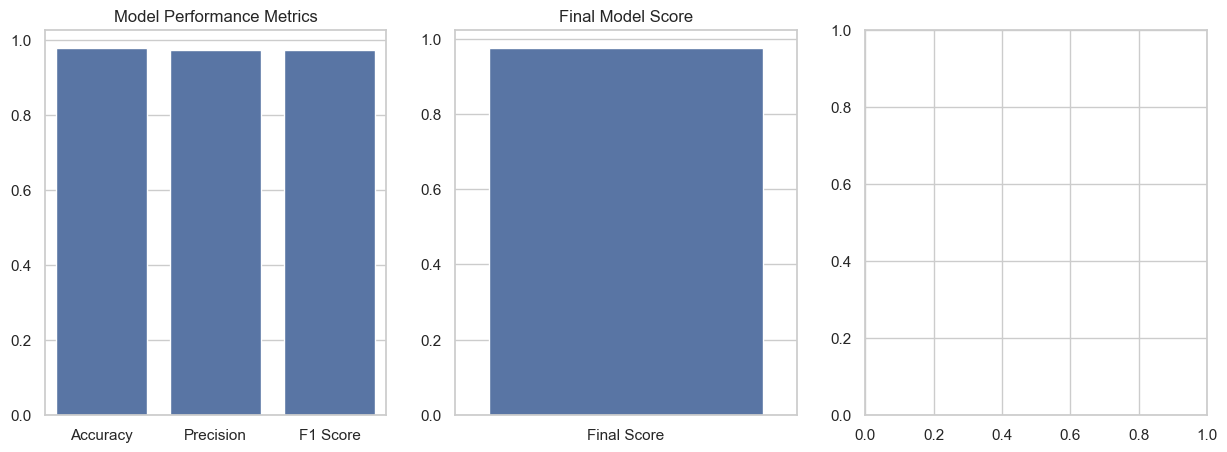

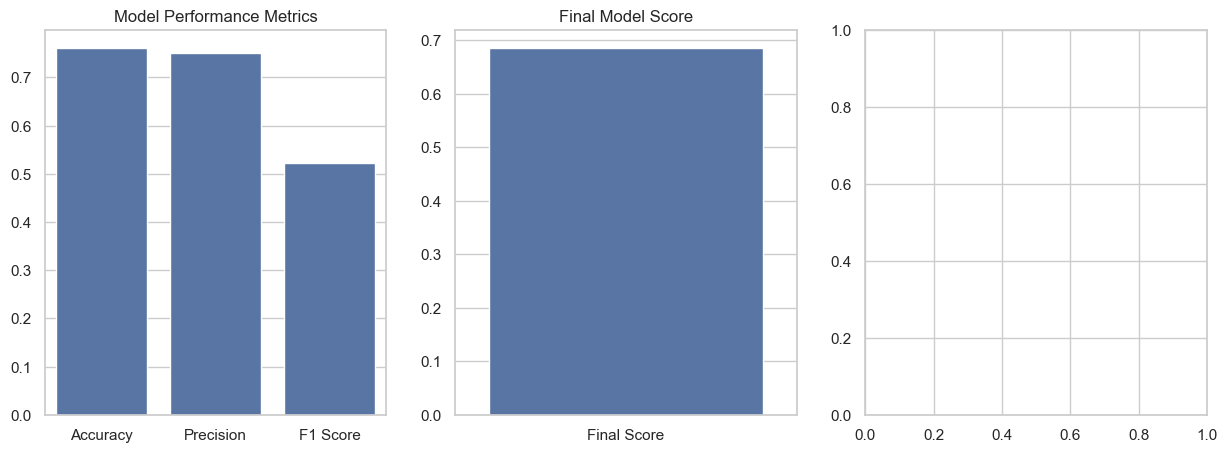

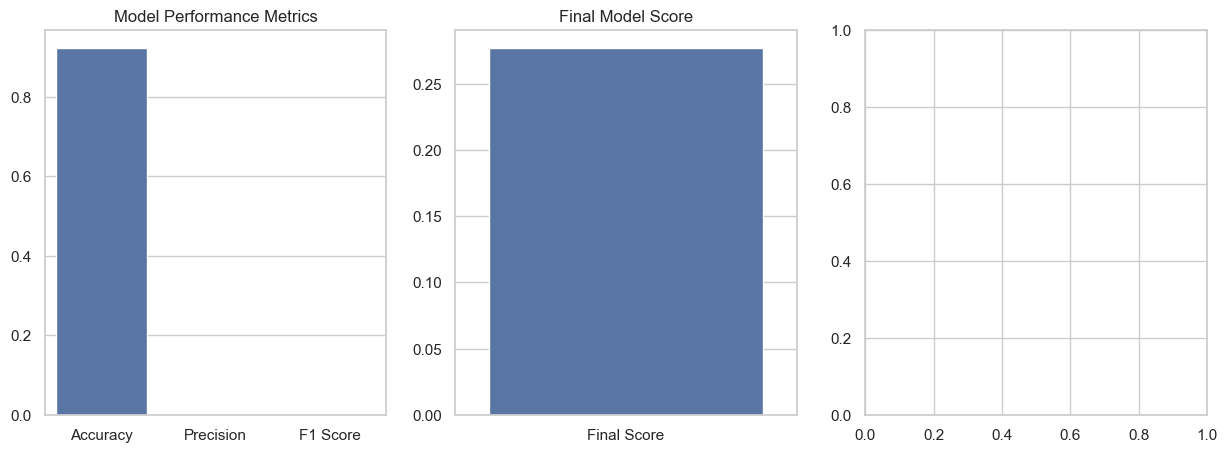

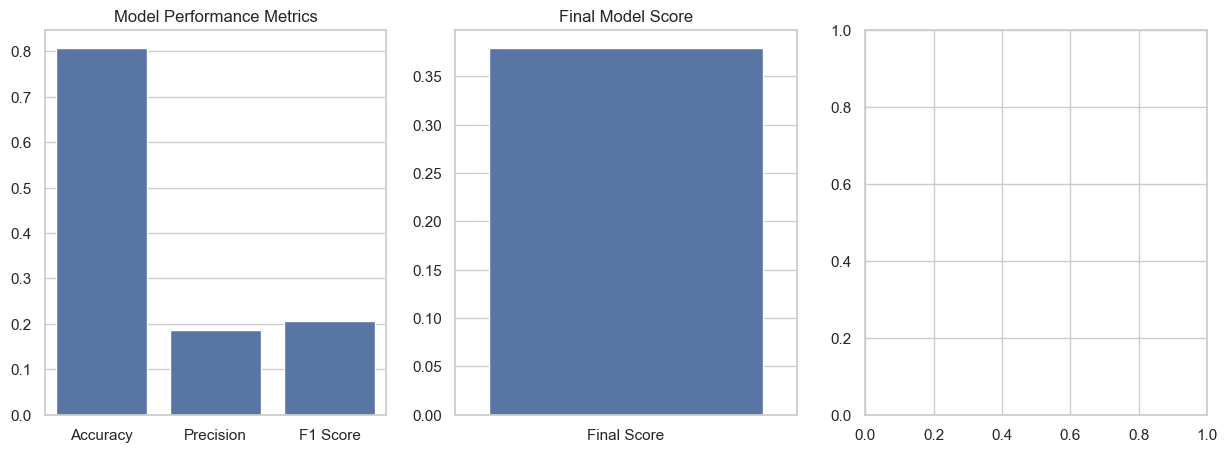

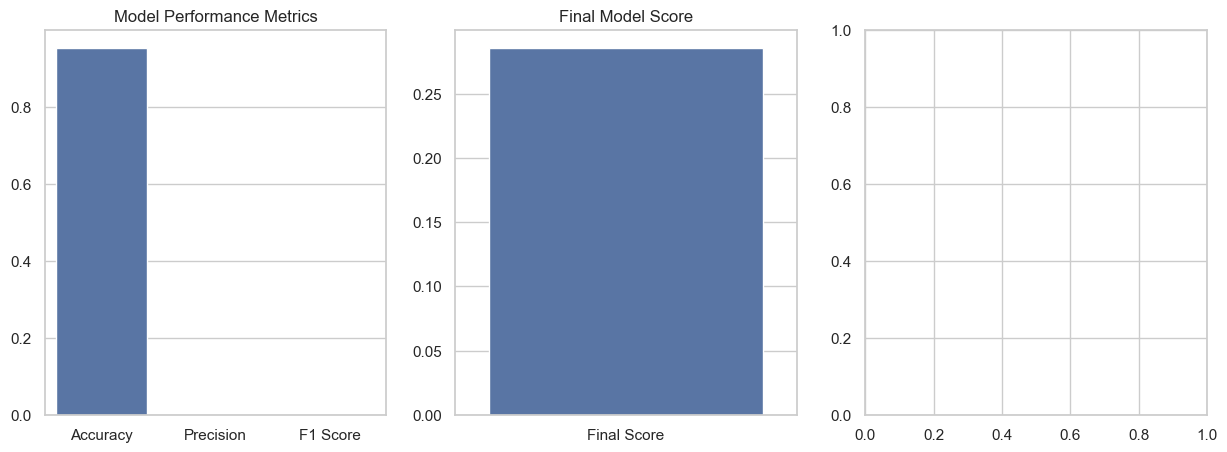

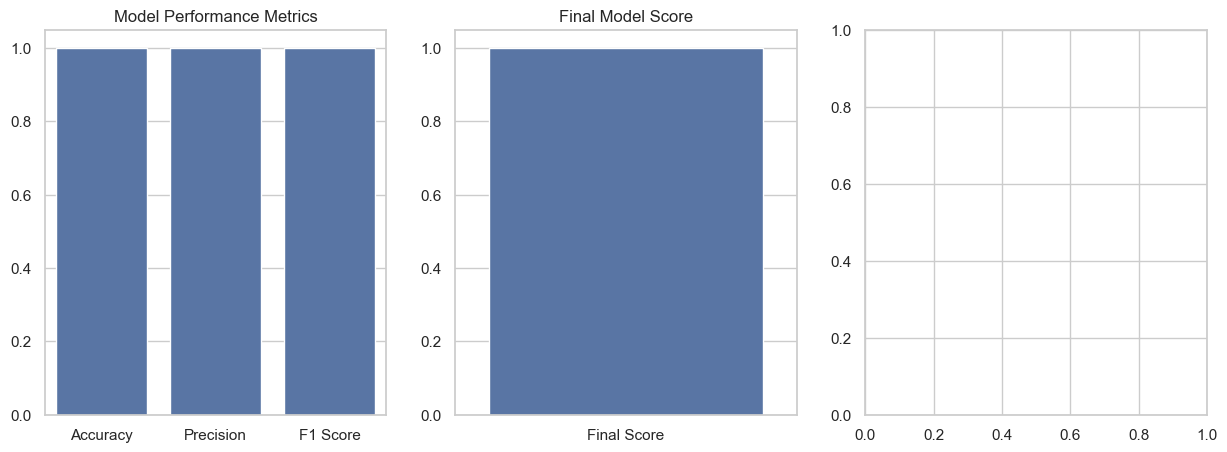

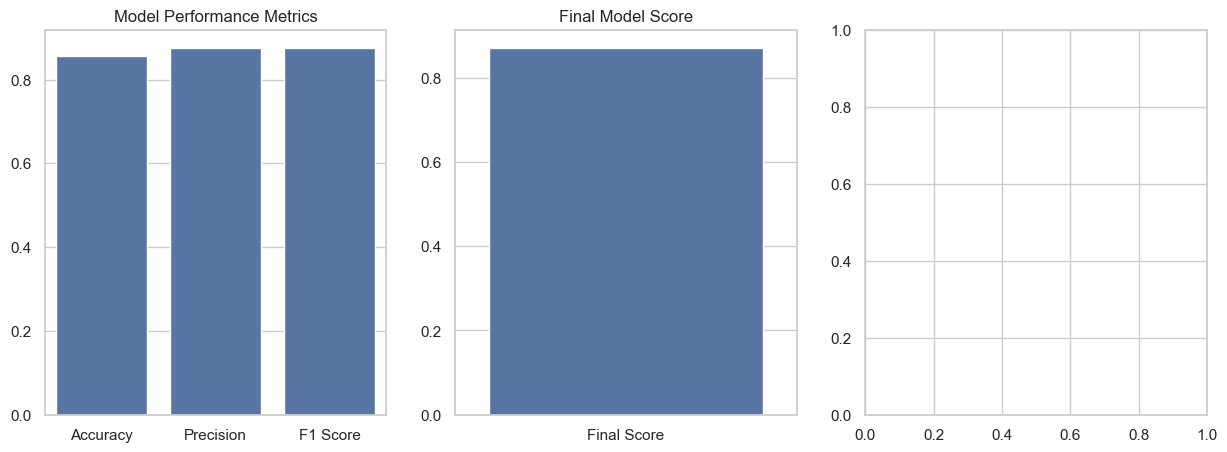

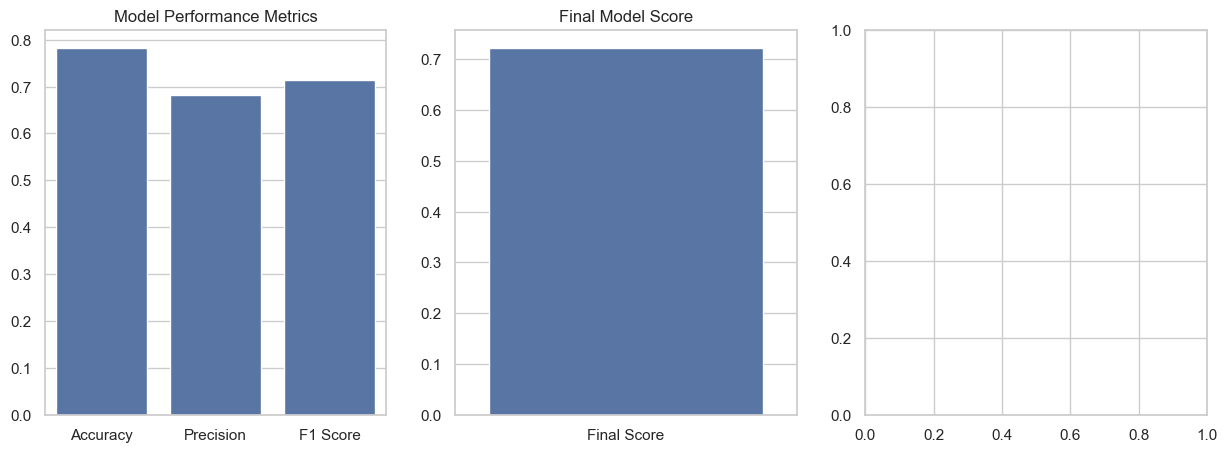

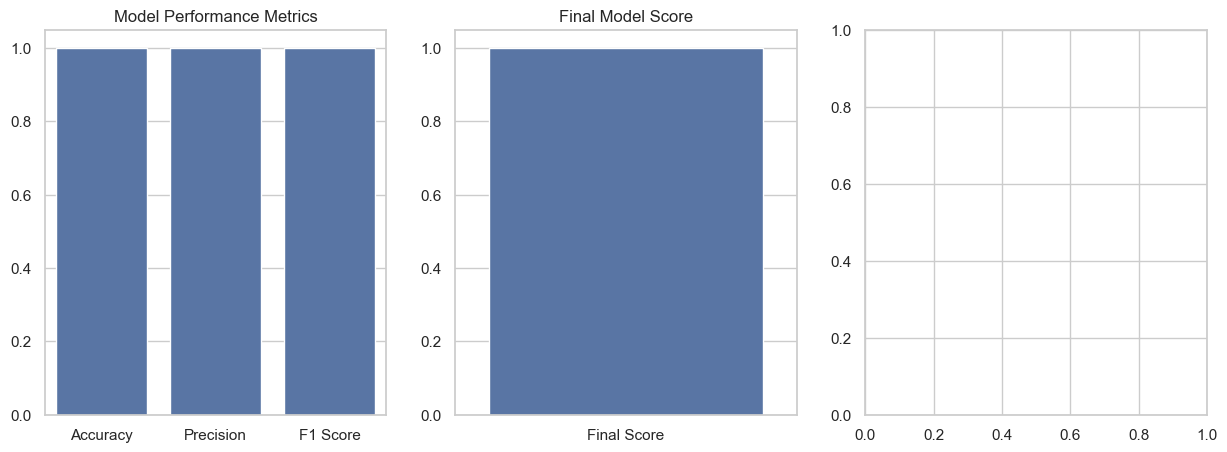

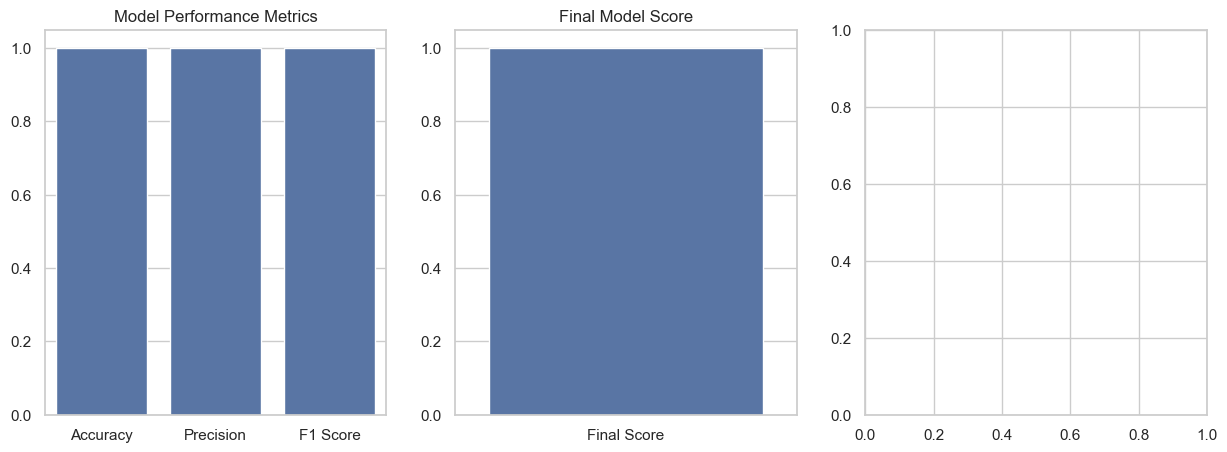

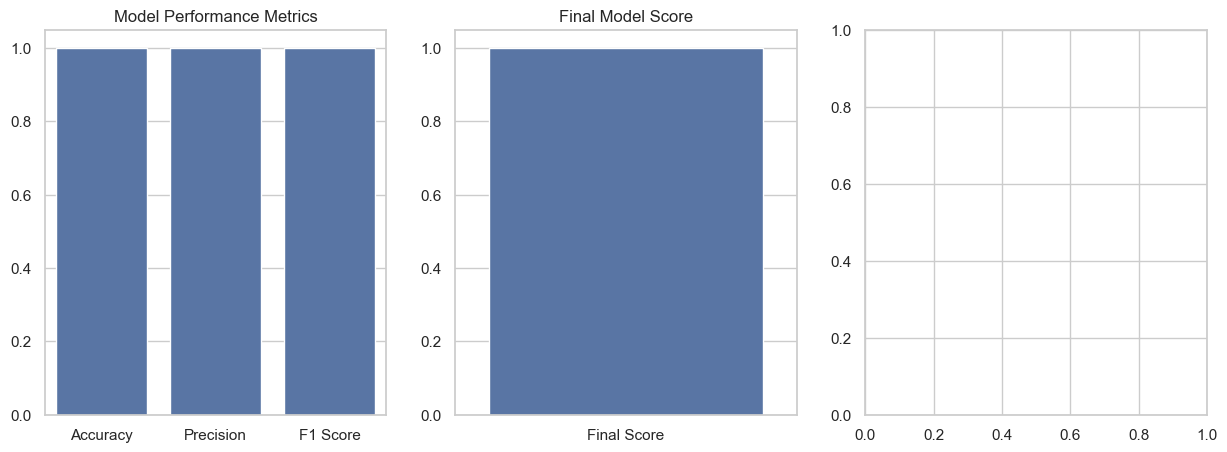

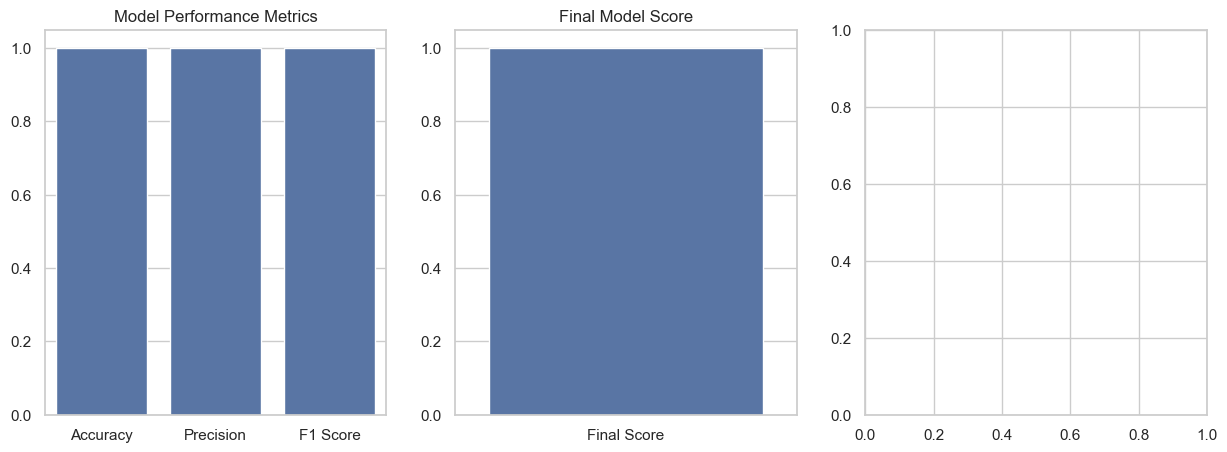

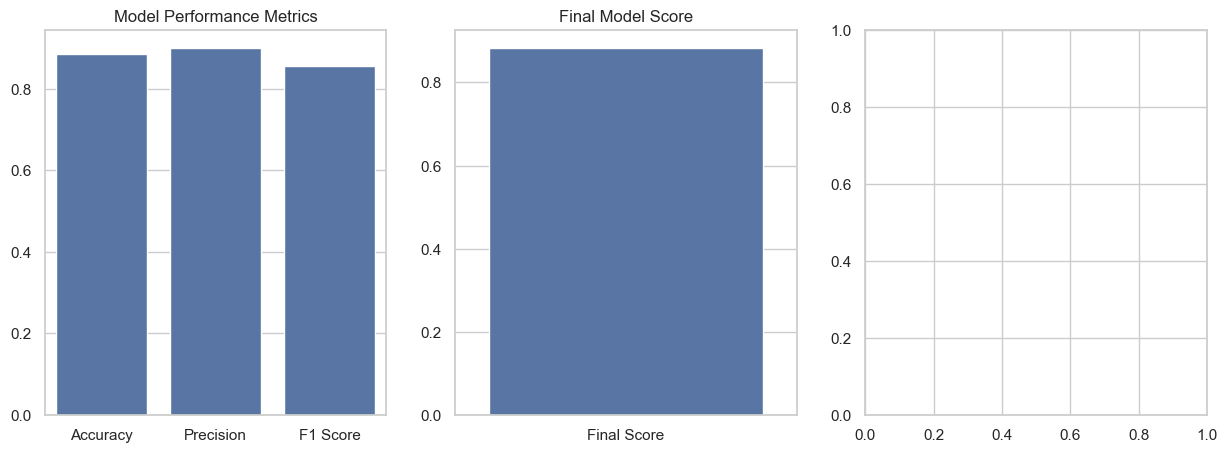

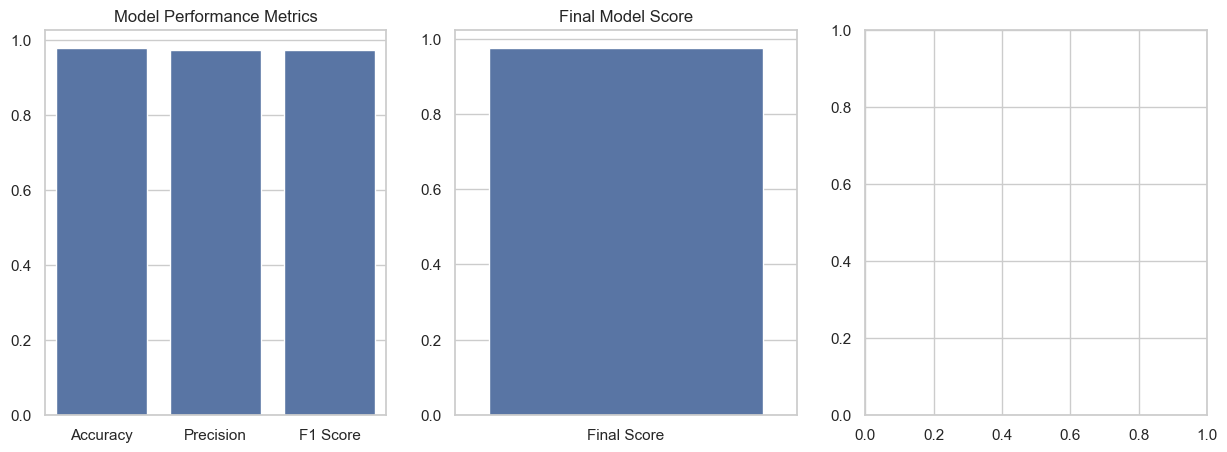

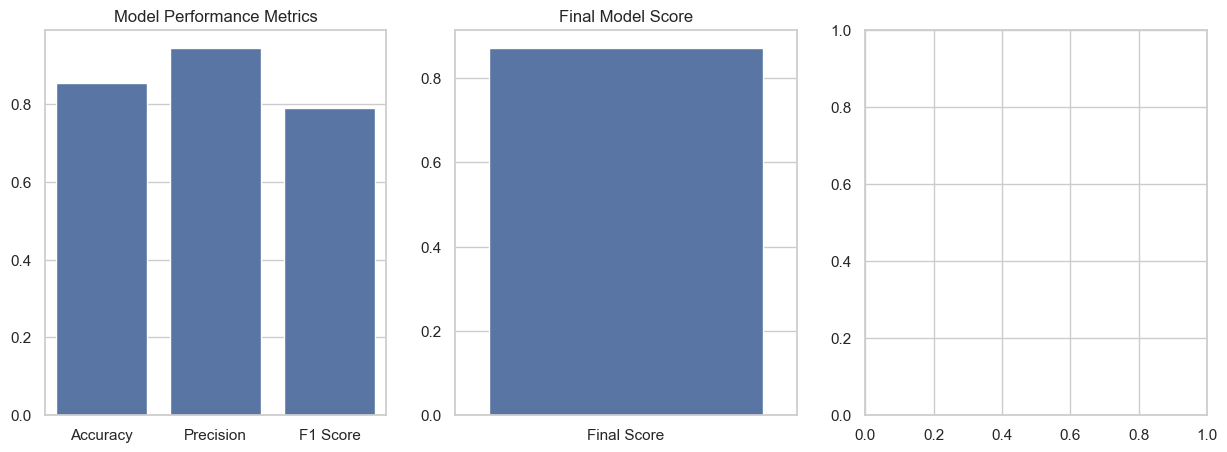

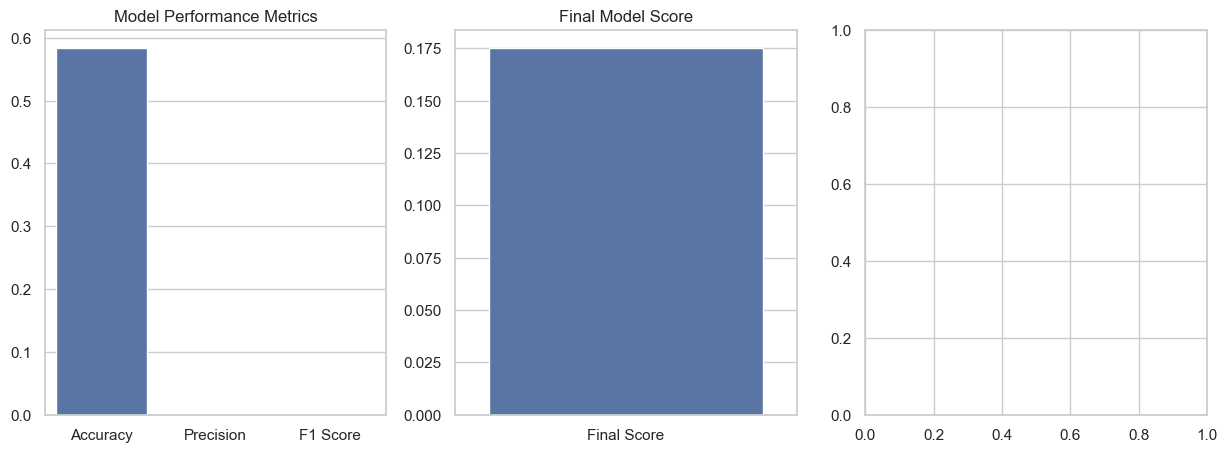

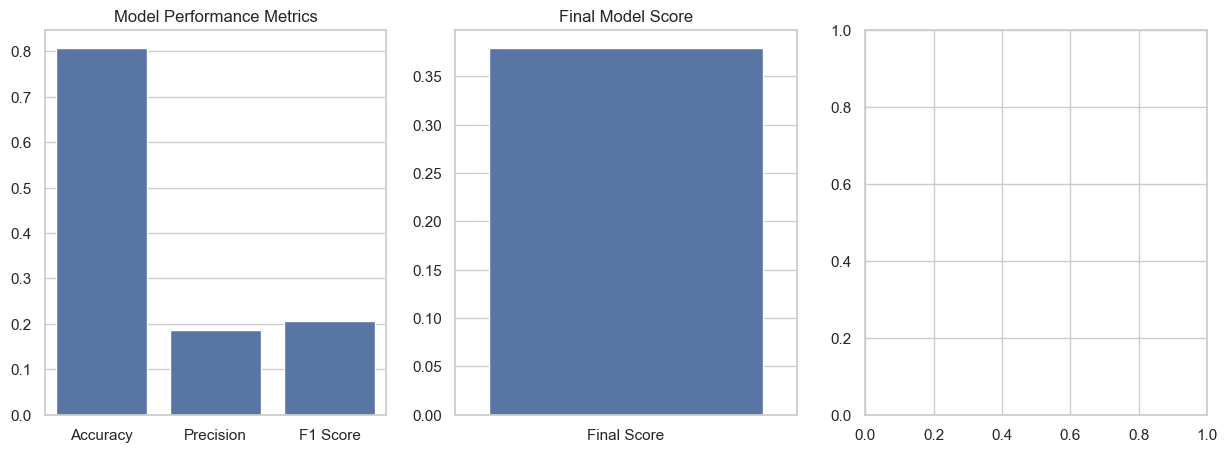

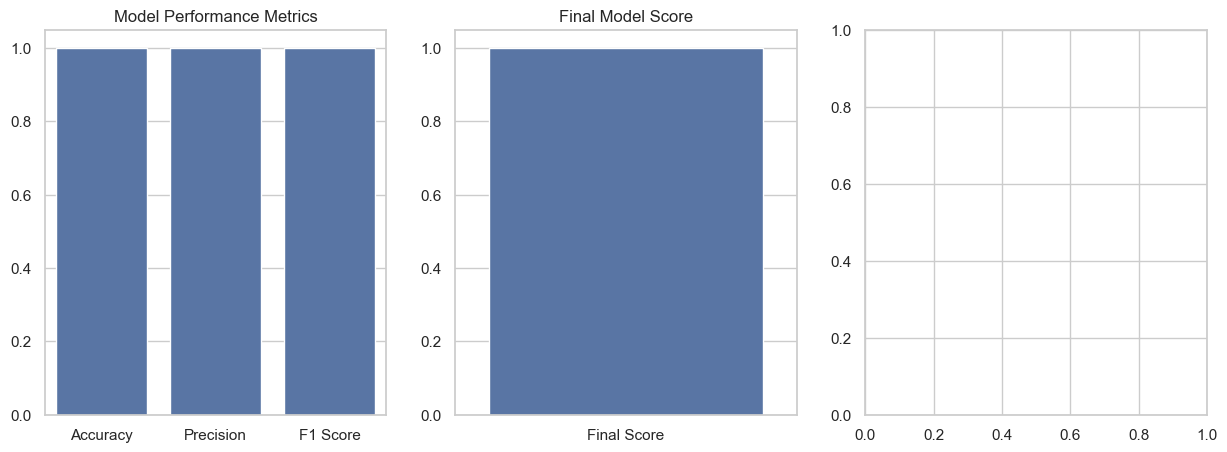

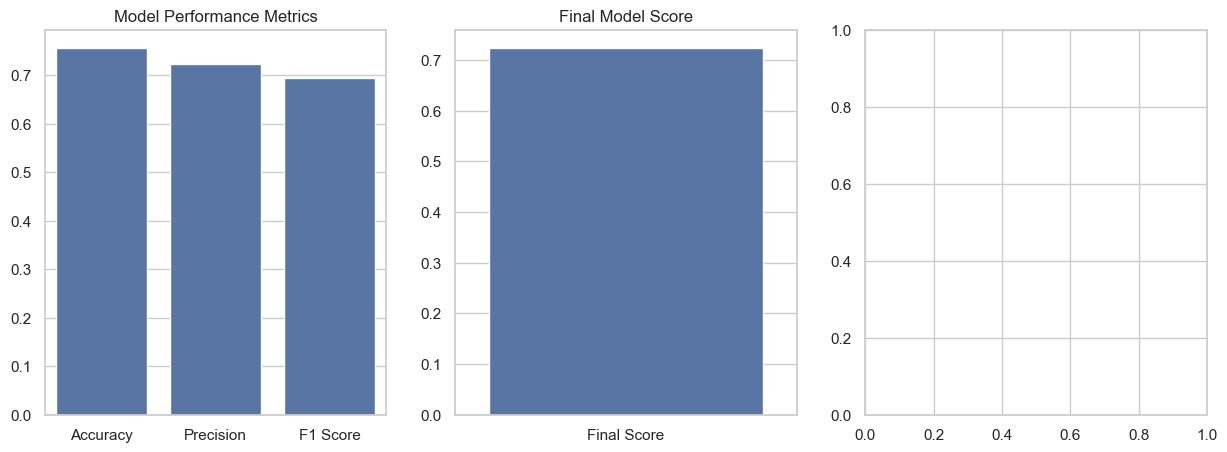

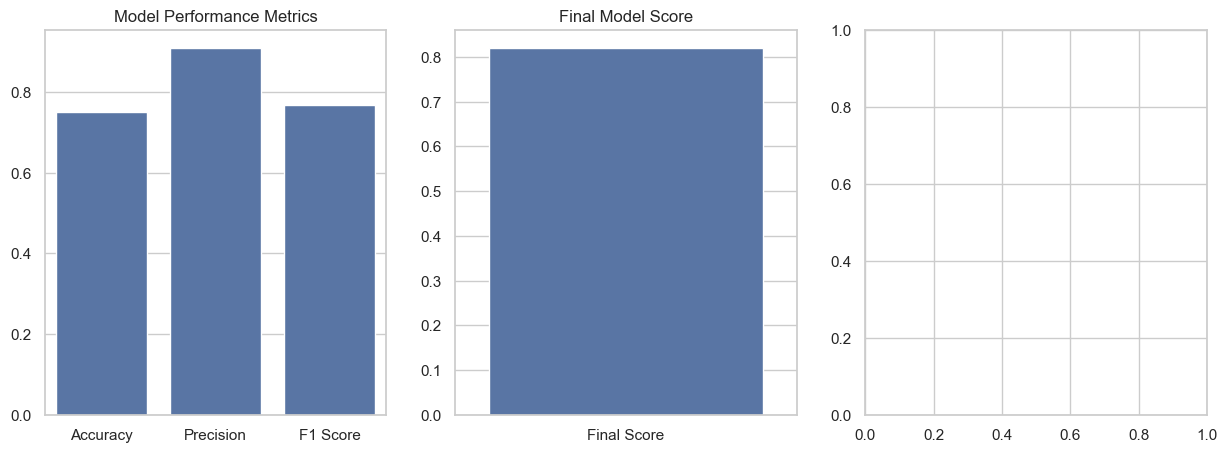

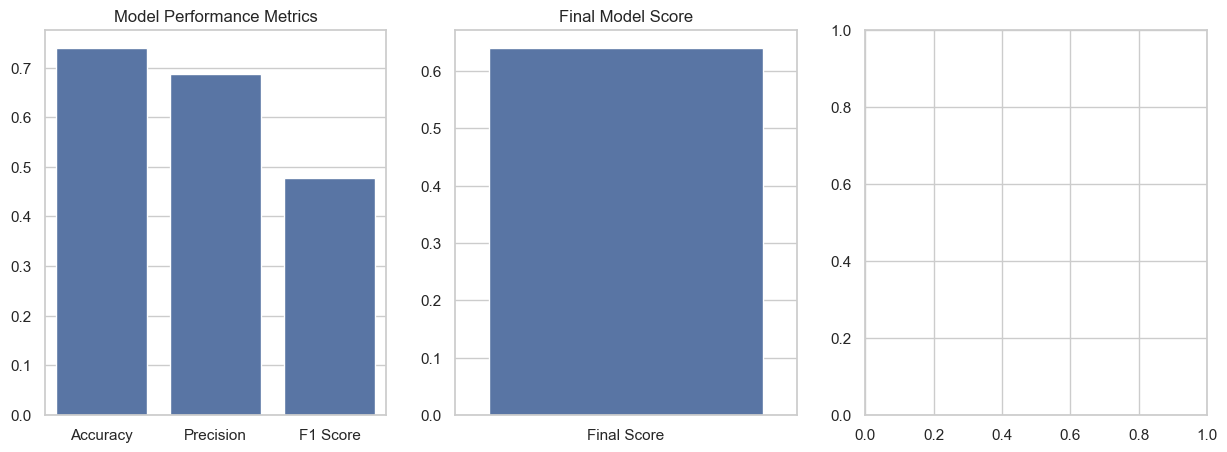

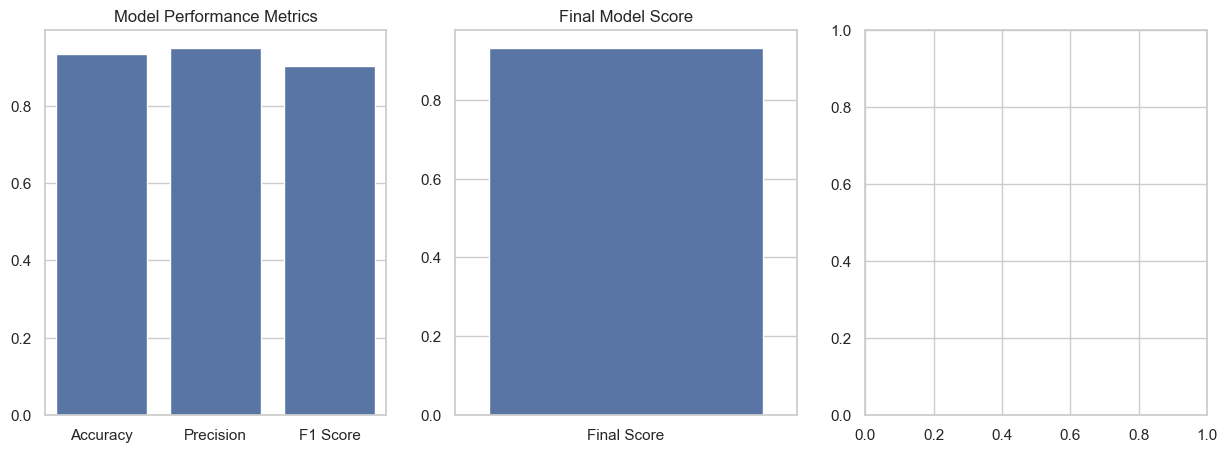

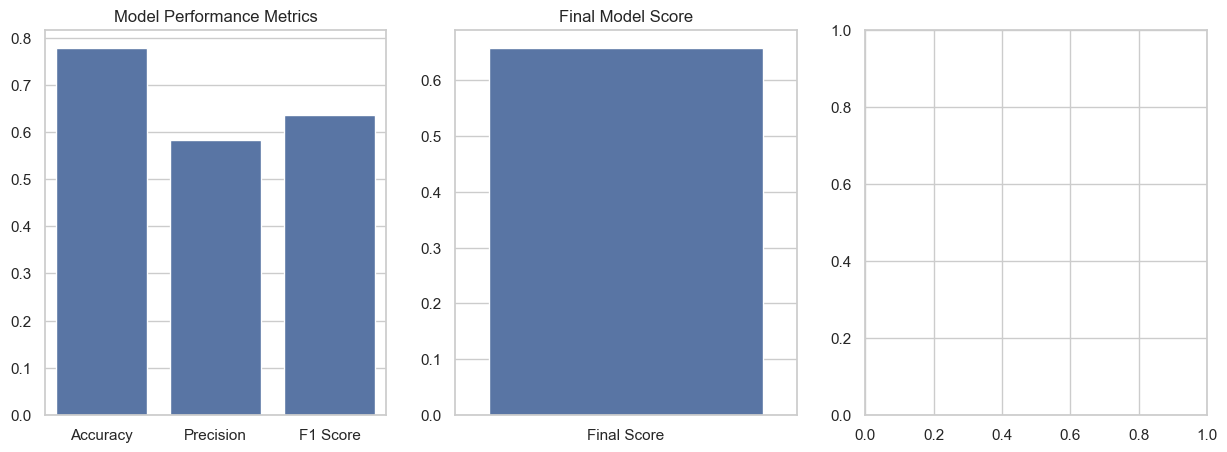

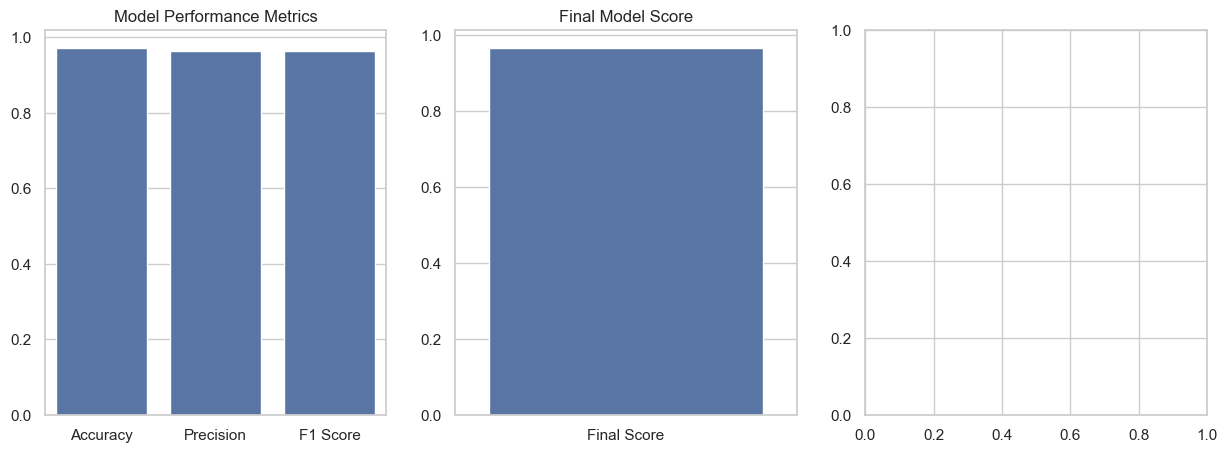

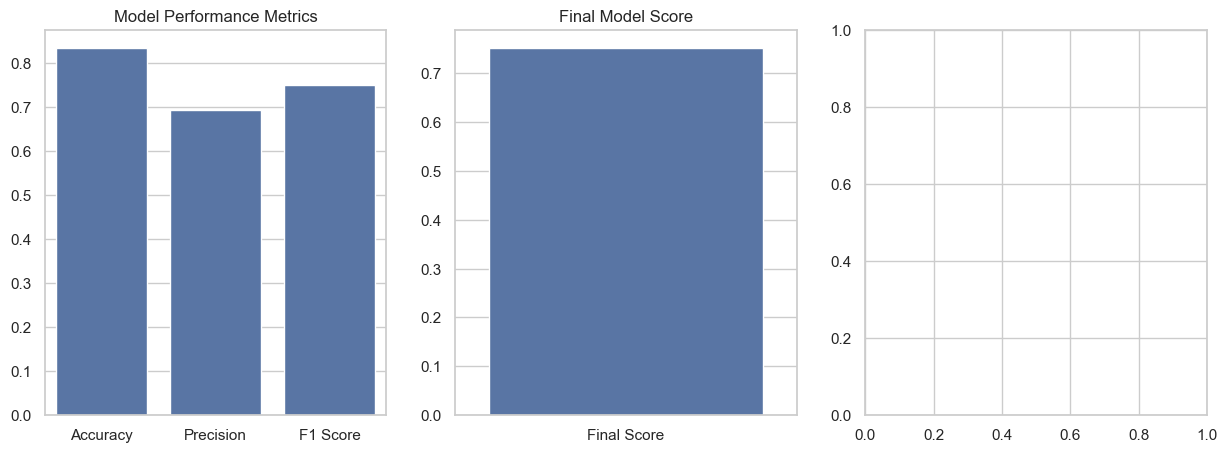

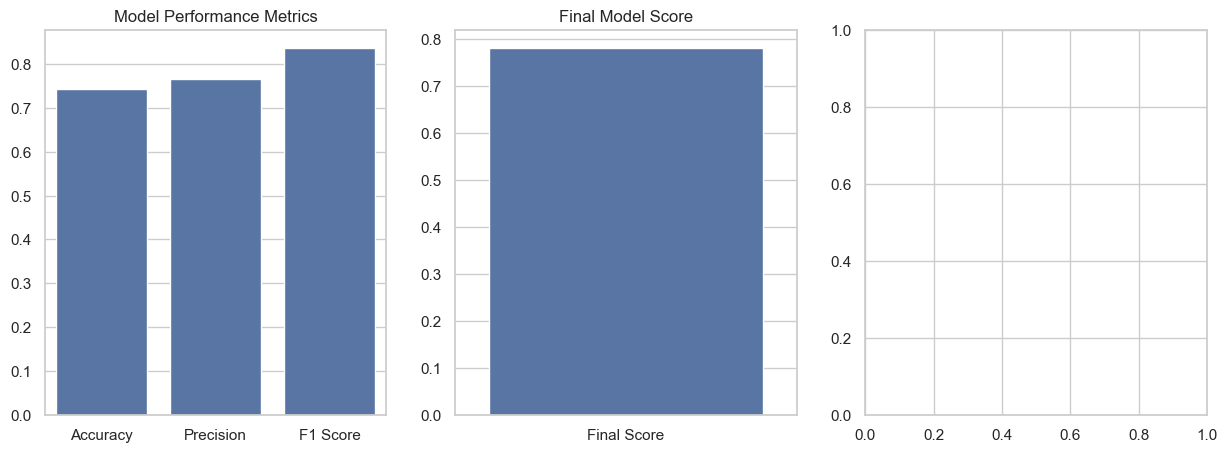

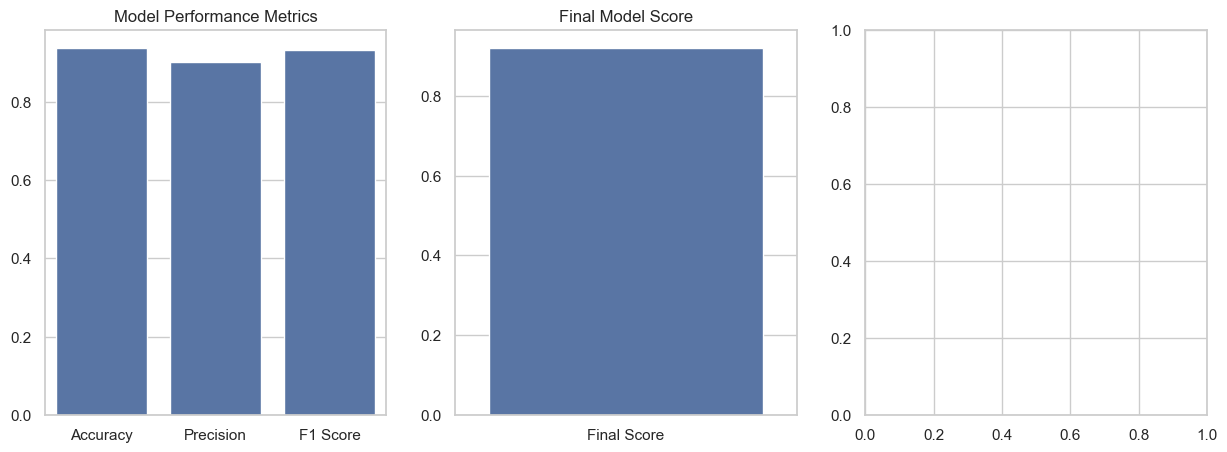

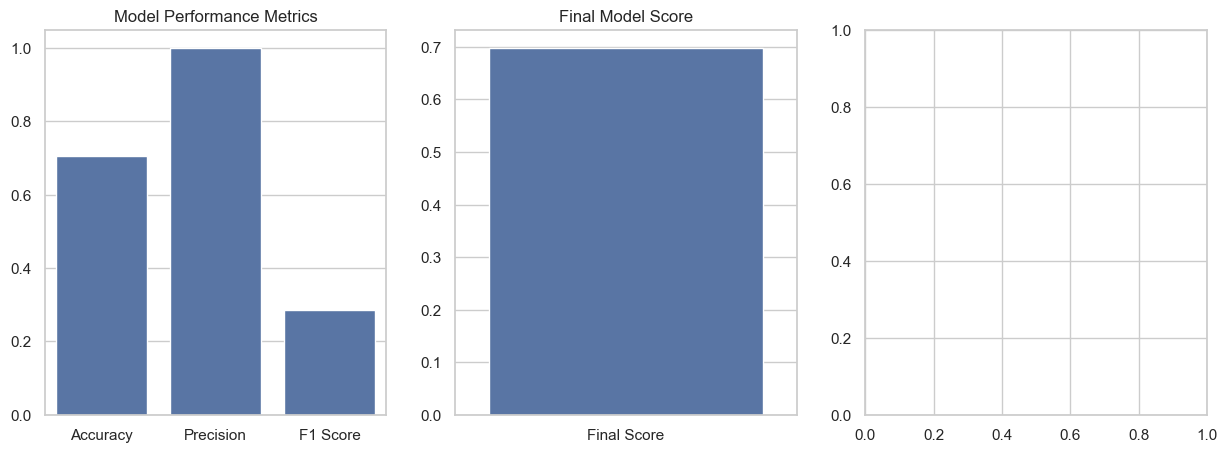

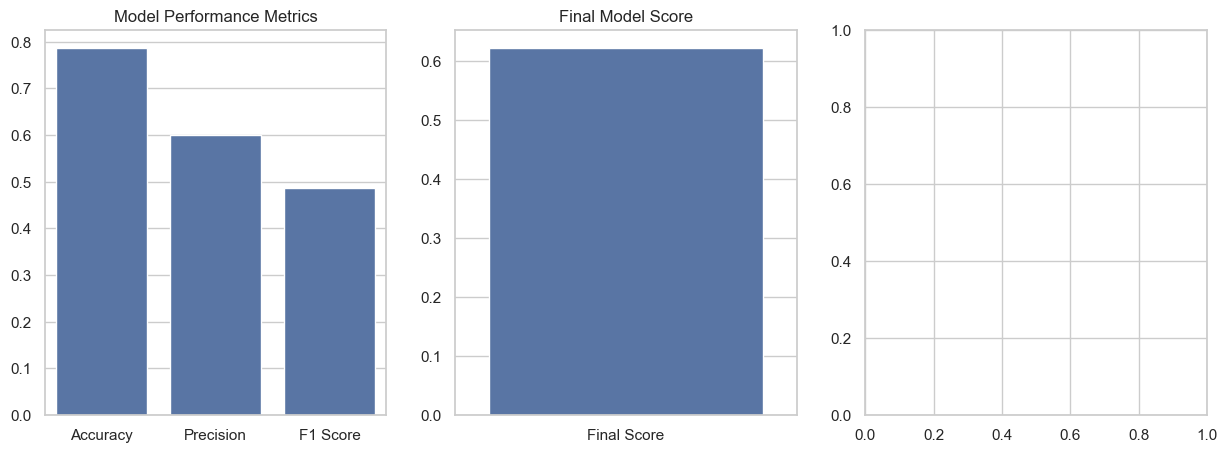

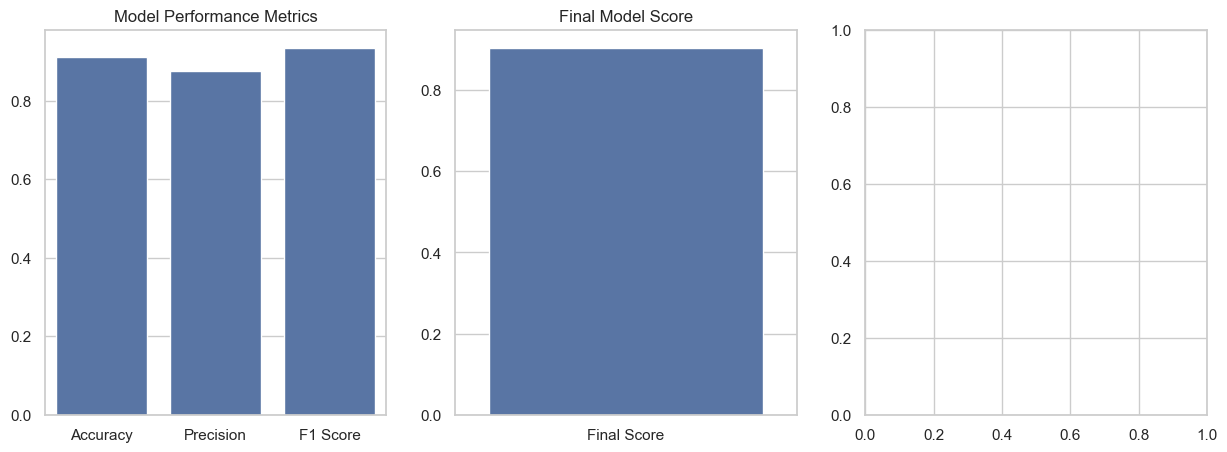

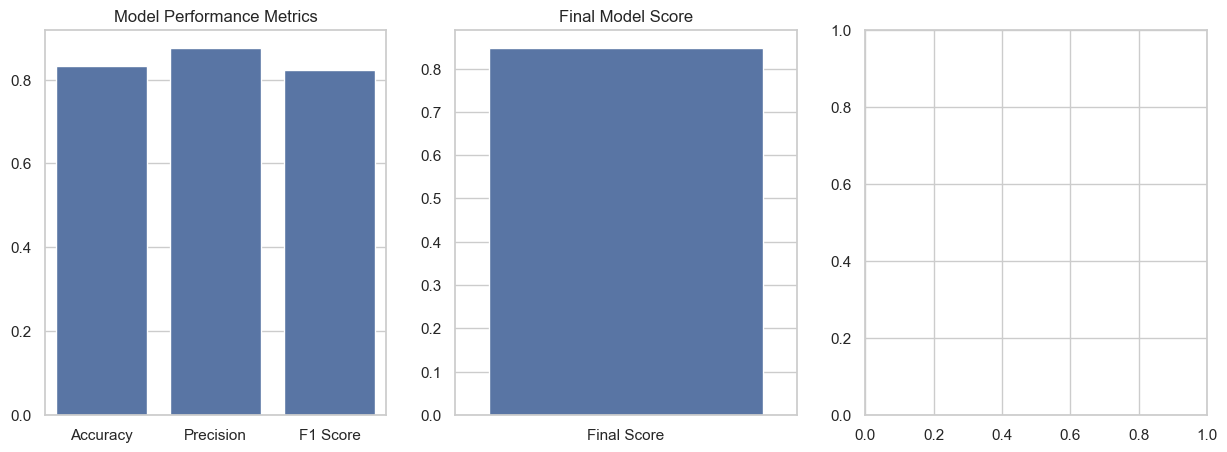

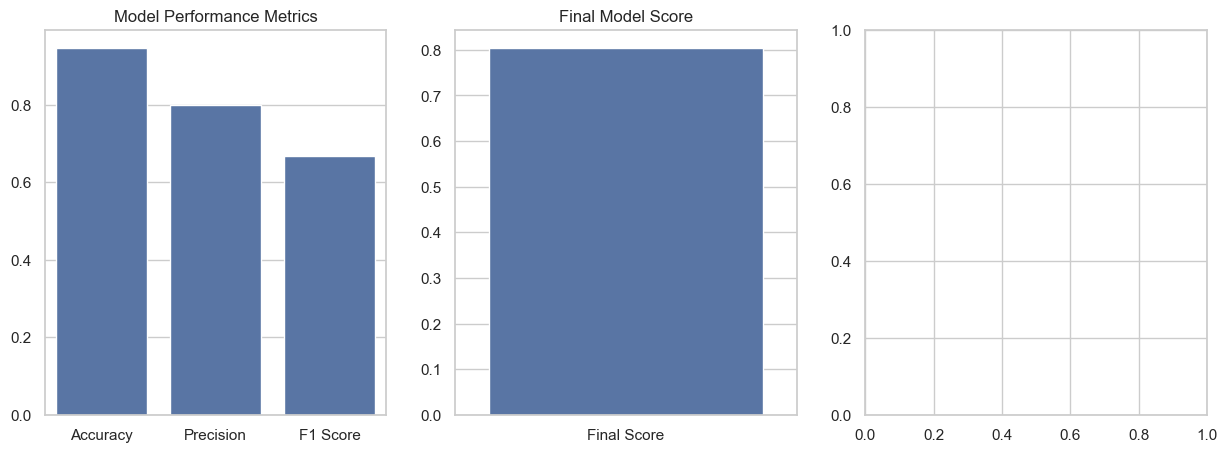

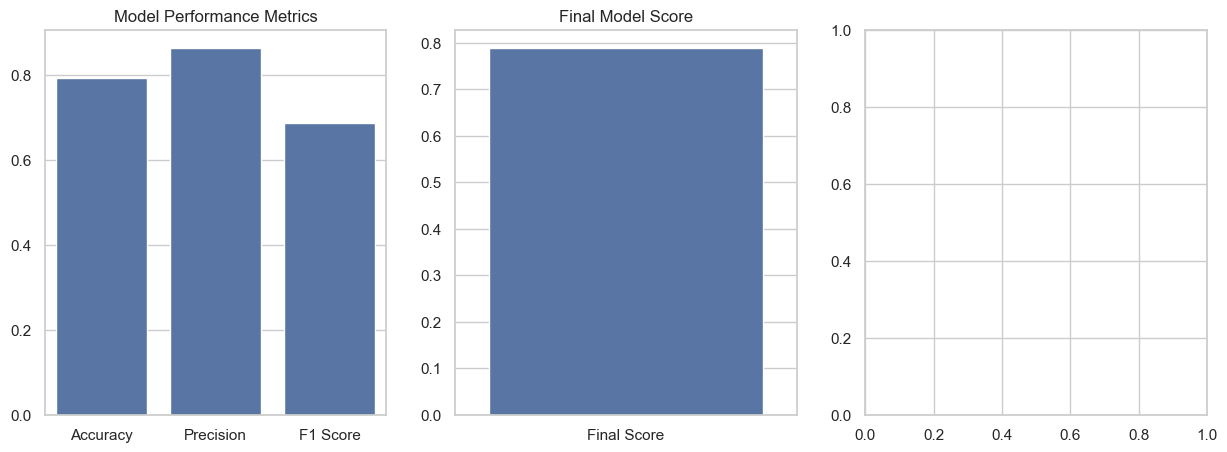

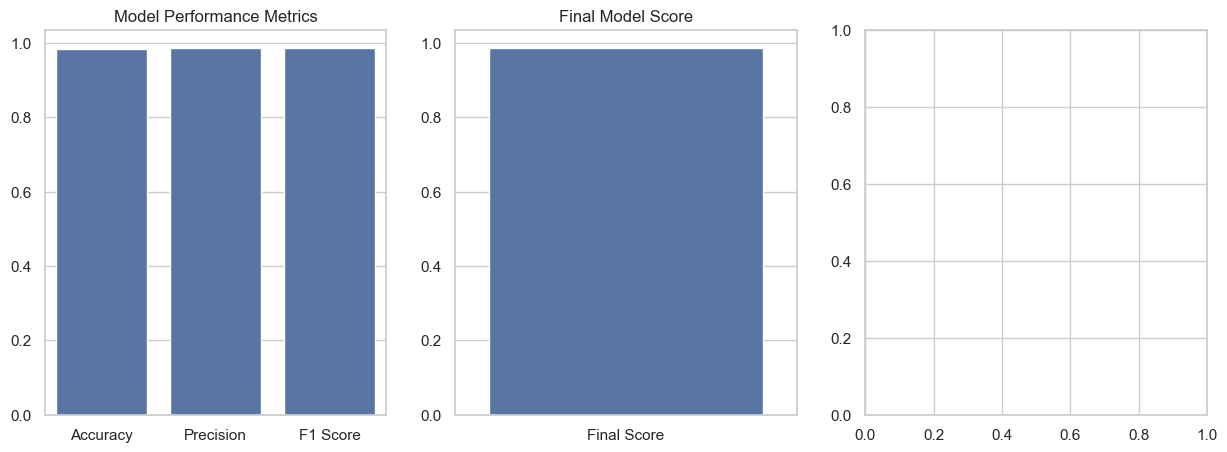

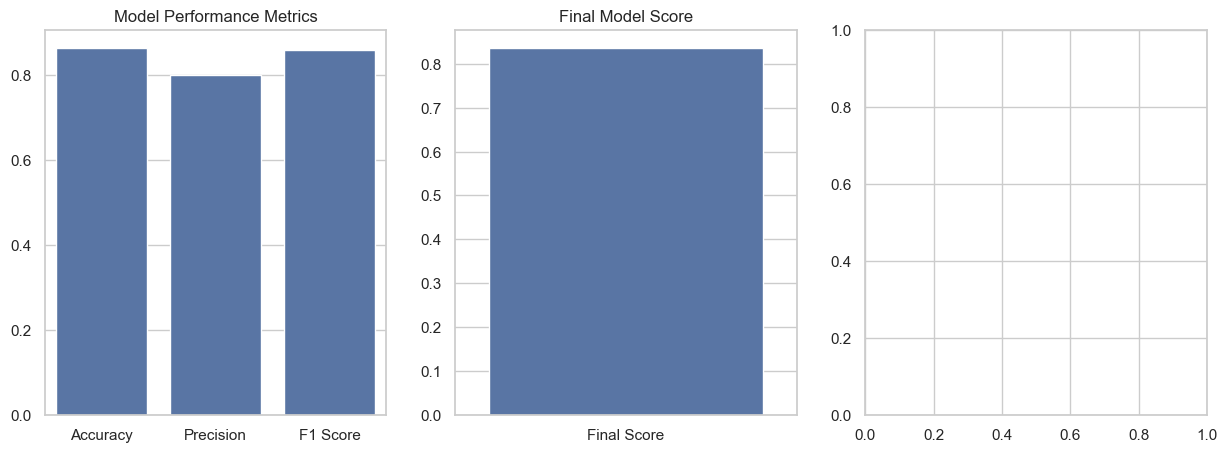

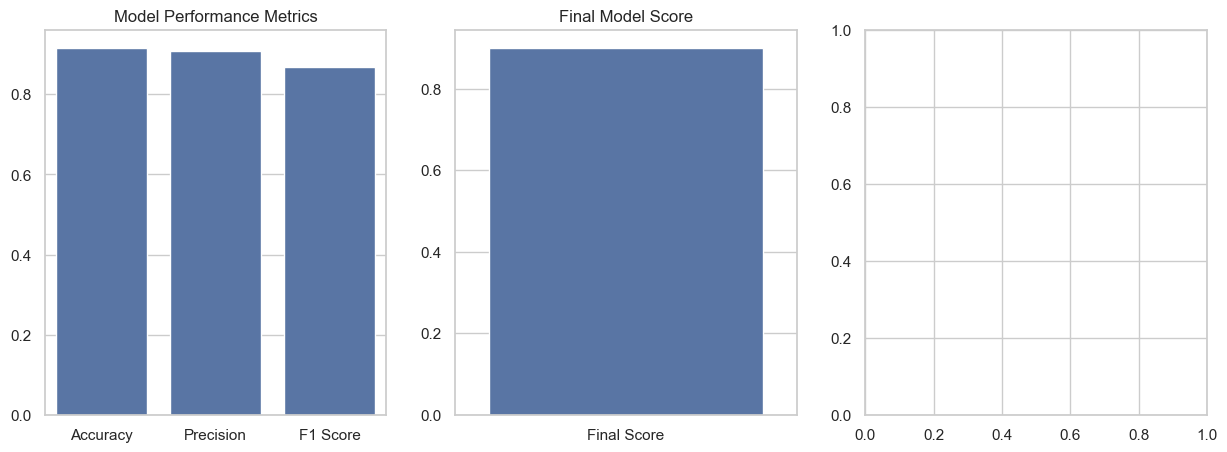

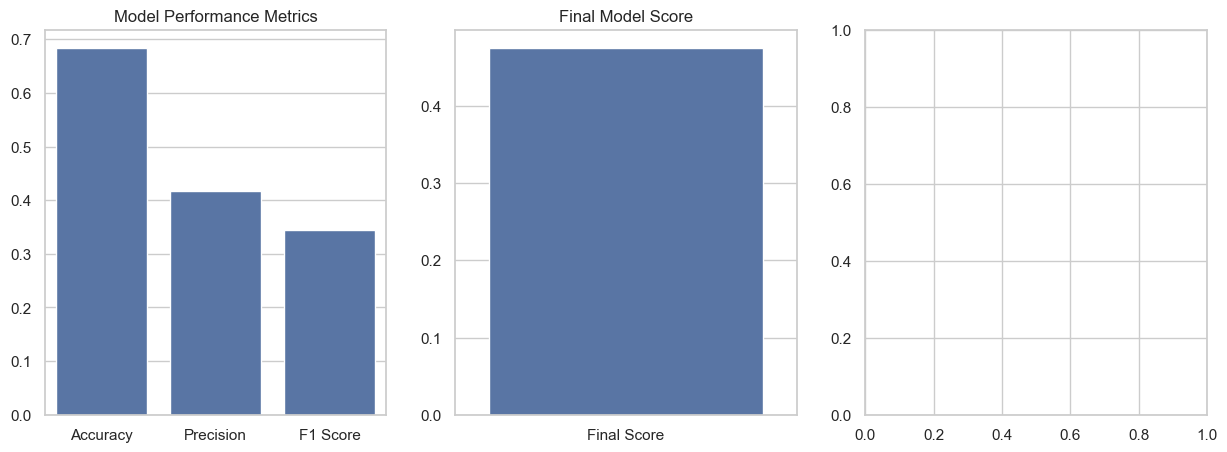

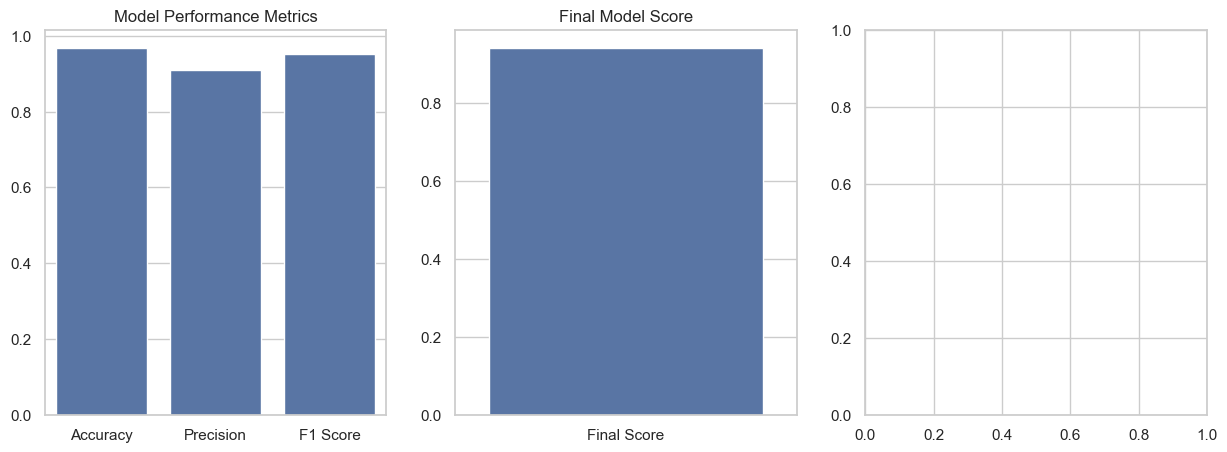

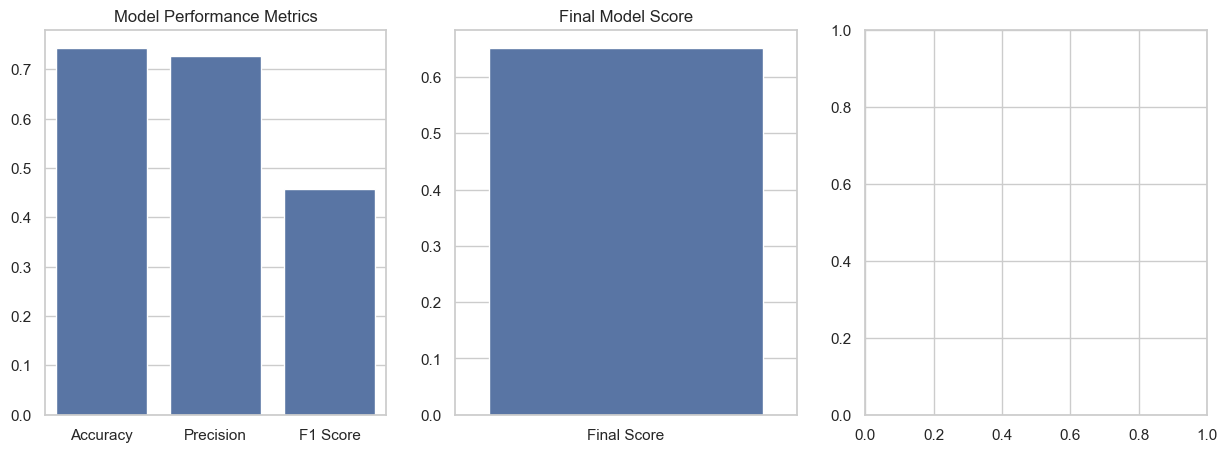

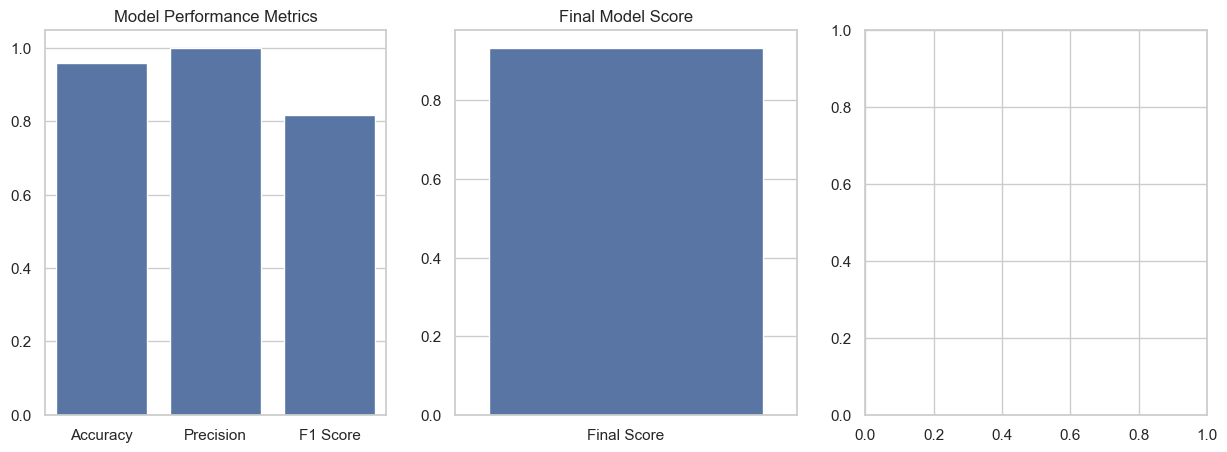

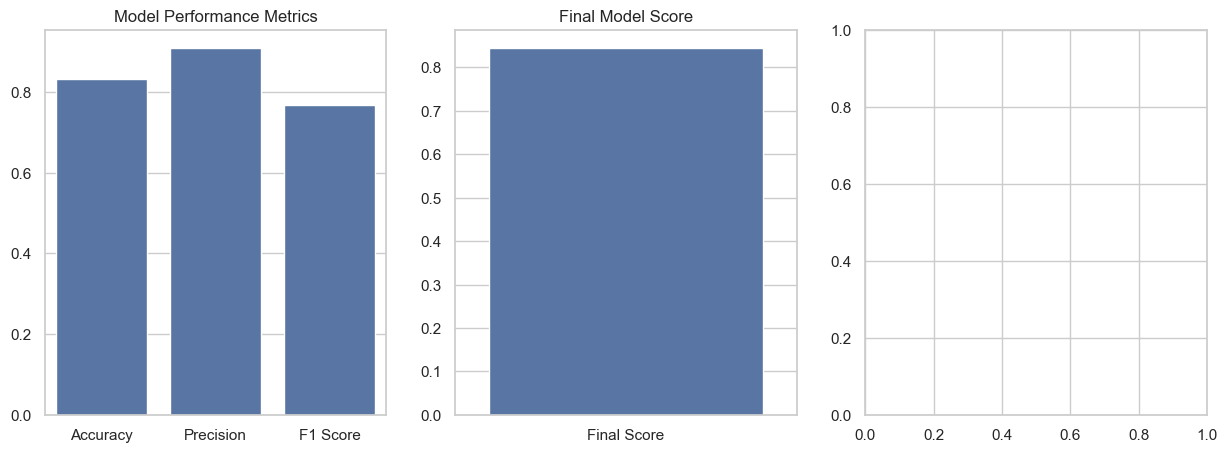

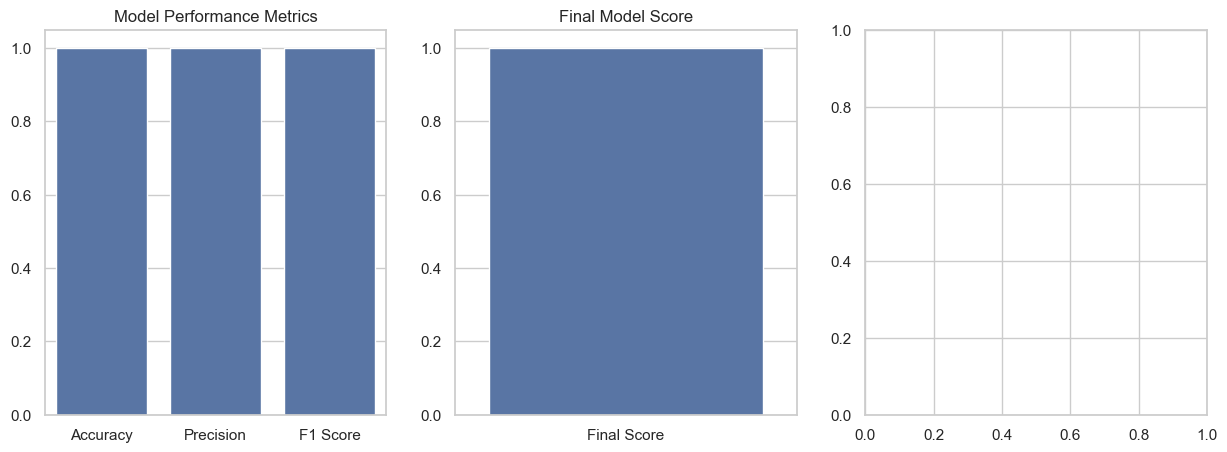

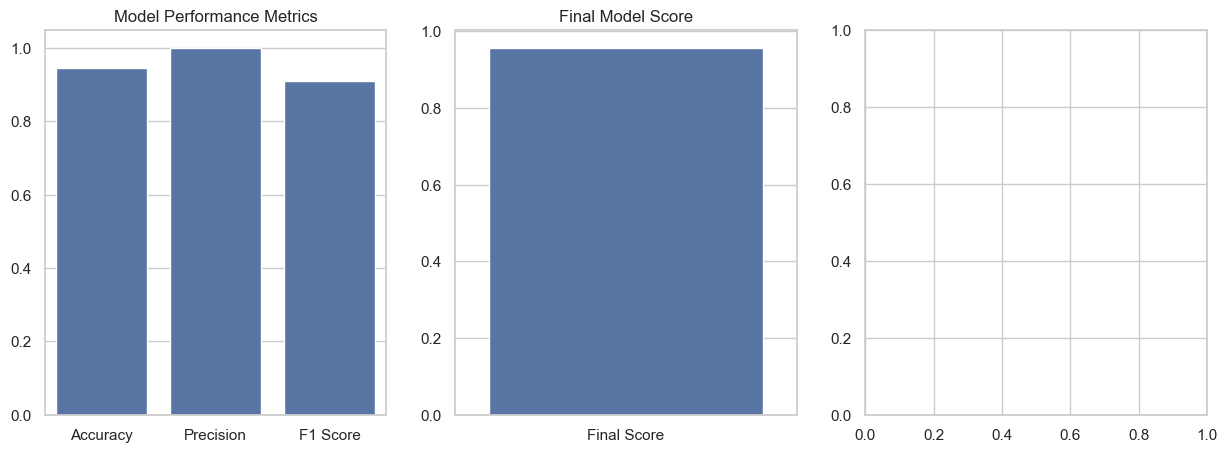

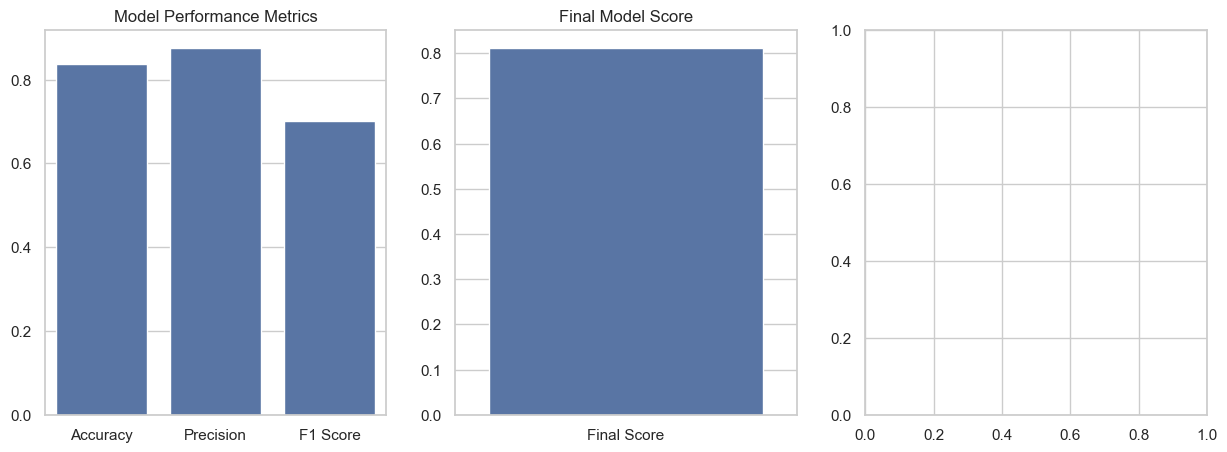

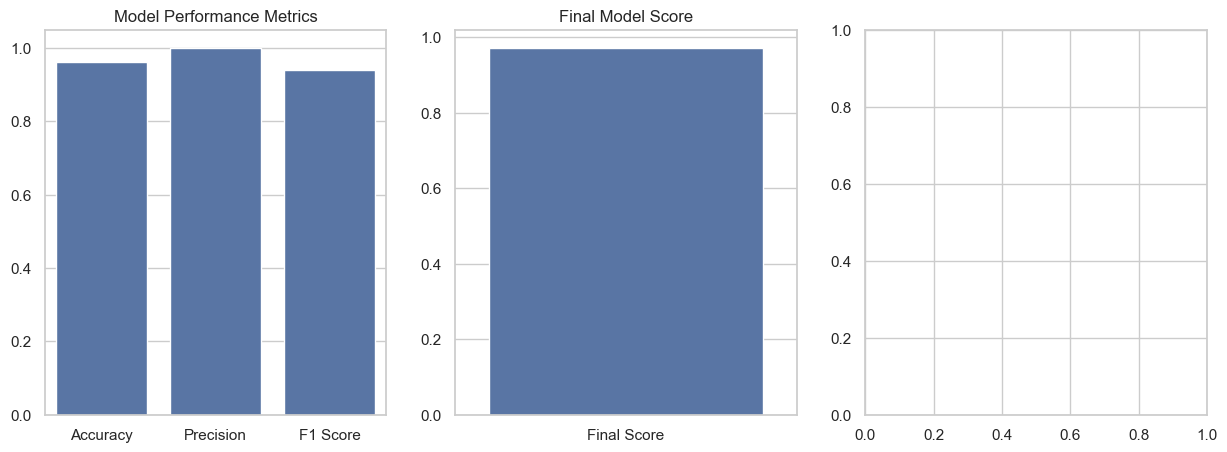

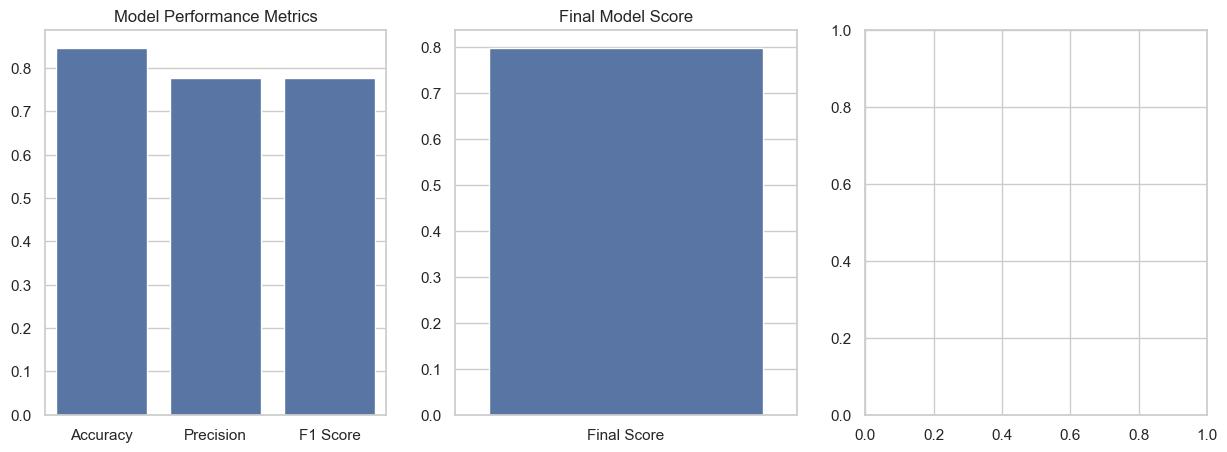

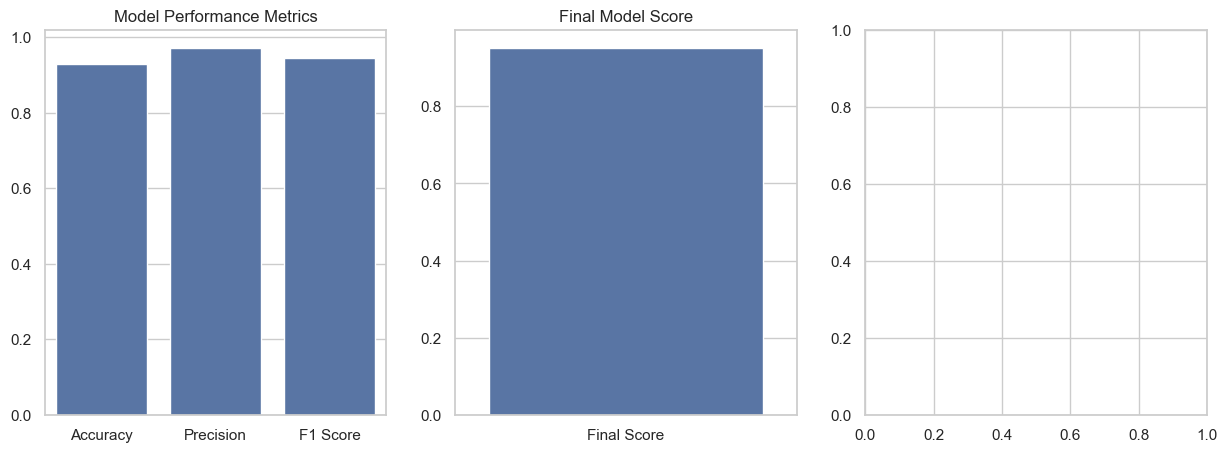

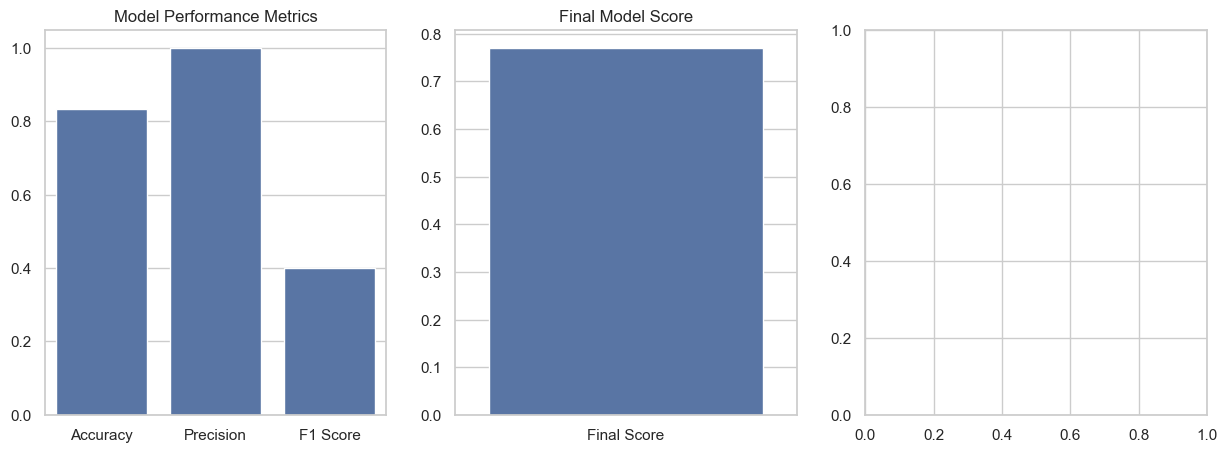

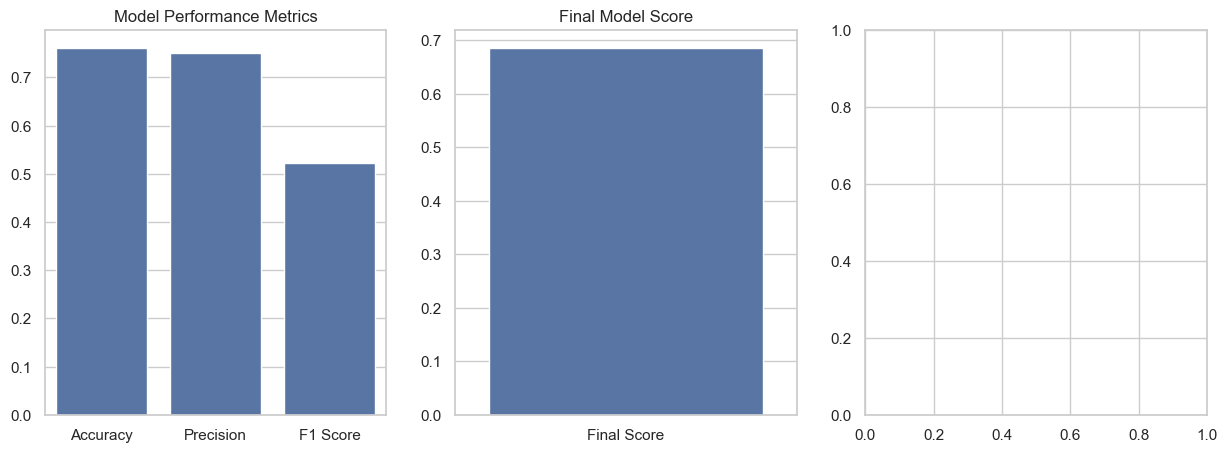

In [2]:

# Path to the data folder
data_folder = '../Competition_data'

# Function to preprocess data, train model, and save predictions
def process_dataset(dataset_path):
    print(f"Processing {dataset_path}...")
    X_train = pd.read_csv(dataset_path / 'X_train.csv')
    y_train = pd.read_csv(dataset_path / 'y_train.csv').squeeze()
    X_test = pd.read_csv(dataset_path / 'X_test.csv')
    
    # Basic feature engineering (e.g., checking for missing values, scaling, etc.)
    if X_train.isnull().any().any():
        X_train.fillna(X_train.mean(), inplace=True)
    if X_test.isnull().any().any():
        X_test.fillna(X_test.mean(), inplace=True)

    # Split training data for validation
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Model training
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_split, y_train_split)

    # Validation
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    score = accuracy * 0.3 + precision * 0.4 + f1 * 0.3
    
    print(f"Validation Results for {dataset_path}: Accuracy={accuracy:.3f}, Precision={precision:.3f}, F1 Score={f1:.3f}, Score={score:.3f}")

    # Visualize results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.barplot(x=['Accuracy', 'Precision', 'F1 Score'], y=[accuracy, precision, f1], ax=ax[0])
    ax[0].set_title("Model Performance Metrics")
    sns.barplot(x=['Final Score'], y=[score], ax=ax[1])
    ax[1].set_title("Final Model Score")

    # Inference on test set
    y_test_pred = model.predict(X_test)
    pd.DataFrame(y_test_pred, columns=['prediction']).to_csv(dataset_path / 'y_predict.csv', index=False)

# Run the function for each dataset
dataset_paths = [Path(data_folder) / d for d in os.listdir(data_folder) if d.startswith("Dataset")]
for dataset_path in dataset_paths:
    process_dataset(dataset_path)
